<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

#### Read the data

Load the csv file and print the first five observations.

In [14]:
df=pd.read_csv('seedtype_data.csv')
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0.0
1,12.13,13.73,5.394,3.745,5.220,0.0
2,14.86,14.67,NaN,3.258,5.351,0.0
3,15.69,14.75,5.527,3.514,5.046,0.0
4,19.94,16.92,6.675,3.763,6.550,1.0


In [15]:
df.shape

(202, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
Area                199 non-null float64
Perimeter           199 non-null float64
Kernel_len          193 non-null float64
Kernel_width        199 non-null float64
Kernelgroove_len    199 non-null float64
Type                199 non-null float64
dtypes: float64(6)
memory usage: 9.6 KB


In [17]:
df.isnull().sum()

Area                3
Perimeter           3
Kernel_len          9
Kernel_width        3
Kernelgroove_len    3
Type                3
dtype: int64

**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df.describe()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
count,199.000000,199.000000,193.000000,199.000000,199.000000,199.000000
mean,15.476533,14.792261,5.651036,3.471643,5.445779,0.356784
std,2.504142,1.210241,0.445302,0.305630,0.479849,0.480258
min,12.010000,13.010000,4.899000,2.911000,4.649000,0.000000
25%,13.345000,13.690000,5.267000,3.200000,5.059500,0.000000
50%,14.990000,14.670000,5.554000,3.485000,5.275000,0.000000
75%,17.490000,15.885000,6.006000,3.763000,5.879000,1.000000
max,21.180000,17.250000,6.675000,4.033000,6.550000,1.000000


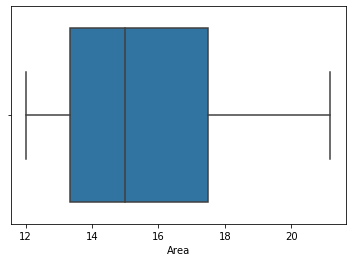

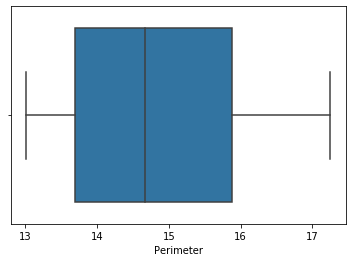

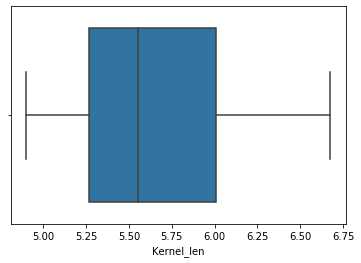

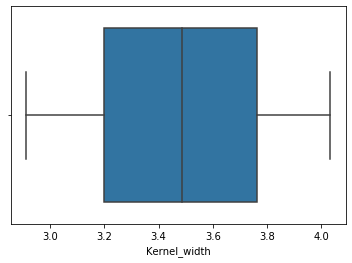

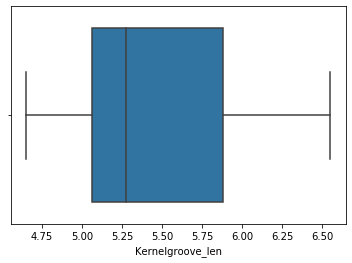

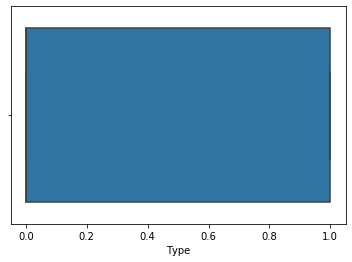

In [19]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [20]:
# The records of all the variables are good

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# pip install missingno

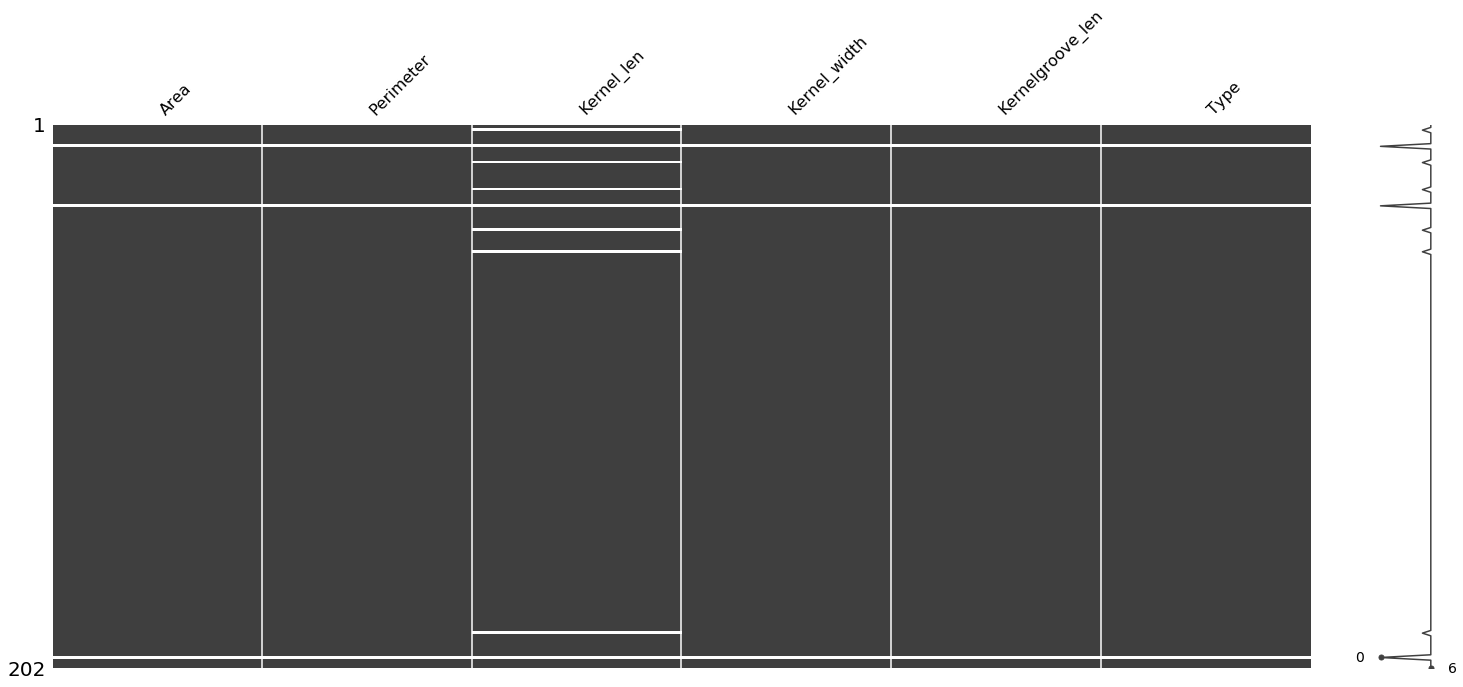

In [30]:
import missingno as ms
ms.matrix(df)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df['Kernel_len'].skew()

0.4773211651423215

In [33]:
(df['Kernel_len'].isnull().sum()/(df.shape[0]))*100

4.455445544554455

In [34]:
df['Kernel_len'].fillna(df['Kernel_len'].mean(),inplace=True)

In [36]:
df['Kernel_len'].isnull().sum()

0

In [37]:
# checking for other variables
df.isnull().sum()

Area                3
Perimeter           3
Kernel_len          0
Kernel_width        3
Kernelgroove_len    3
Type                3
dtype: int64

In [38]:
# Very few null values in the other columns. So, let's drop those null value rows.
df.dropna(subset=['Area','Perimeter','Kernel_width','Kernelgroove_len','Type'],inplace=True)
df.isnull().sum()

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

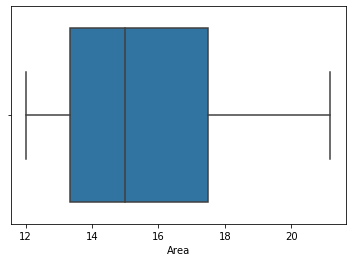

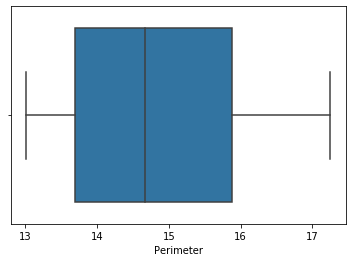

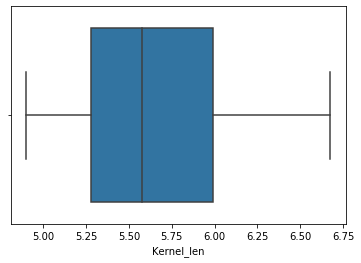

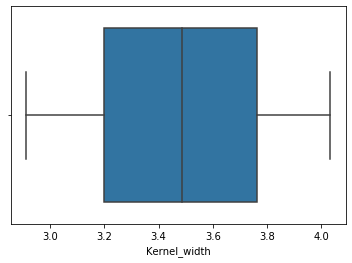

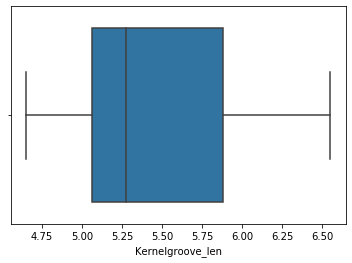

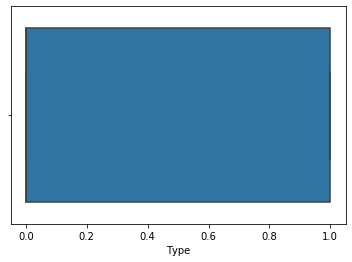

In [39]:
num_cols = df.select_dtypes(np.number)
for col in num_cols.columns:
    sns.boxplot(df[col])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=4)
gb=GradientBoostingClassifier(n_estimators=250,max_depth=2)
gb.fit(x_train,y_train)

y_pred=gb.predict(x_test)
y_prob=gb.predict_proba(x_test)[:,1]

cm=confusion_matrix(y_test,y_pred)

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

sensitivity=TP/(TP+FN)
precision=TP/(TP+FP)

print("sensitivity is : ",sensitivity)
print("prcision is : ",precision)

sensitivity is :  0.8947368421052632
prcision is :  1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

AUC score is :  0.9949874686716792


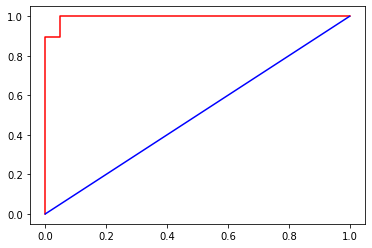

In [43]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=4)
adc=AdaBoostClassifier(n_estimators=80)
adc.fit(x_train,y_train)

y_pred=adc.predict(x_test)
y_prob=adc.predict_proba(x_test)[:,1]

print("AUC score is : ",roc_auc_score(y_test,y_prob))
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'b')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [44]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=4)

gb=GradientBoostingClassifier()
params={'max_depth':[2,3,4,5,6,7,8]}

gsearch=GridSearchCV(gb,param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(x,y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='roc_auc')

In [45]:
print("the optimum depth is : ",gsearch.best_params_['max_depth'])

the optimum depth is :  2


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[13:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.95
[[21  0]
 [ 2 17]]


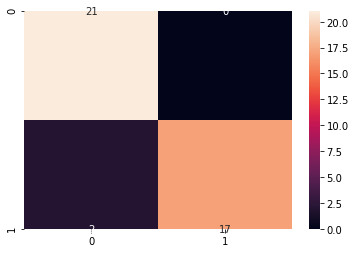

In [47]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=4)

from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.4,gamma=3)
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)
y_prob=xgb.predict_proba(x_test)[:,1]

cm=confusion_matrix(y_test,y_pred)

TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

accuracy=(TN+TP)/(FN+FP+TP+TN)
print("Accuracy : ",accuracy)
print(cm)
df_cm=pd.DataFrame(cm)
sns.heatmap(df_cm,annot=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073000,3.155,4.830,0.0
1,12.13,13.73,5.394000,3.745,5.220,0.0
2,14.86,14.67,5.651036,3.258,5.351,0.0
3,15.69,14.75,5.527000,3.514,5.046,0.0
4,19.94,16.92,6.675000,3.763,6.550,1.0


In [50]:
# all variables are continuous so we will use gaussian naive-bayes
from sklearn.ensemble import StackingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=4)

knn=KNeighborsClassifier(n_neighbors=9)
base_learners=[('naive_bayes',GaussianNB()),('KNN',knn)]

stc=StackingClassifier(estimators=base_learners,final_estimator=AdaBoostClassifier())
stc.fit(x_train,y_train)

y_pred=stc.predict(x_test)
y_prob=stc.predict_proba(x_test)[:,1]

print("AUC-SCORE is : ",roc_auc_score(y_test,y_prob))

AUC-SCORE is :  0.976


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
from xgboost import XGBClassifier
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)

kk=KNeighborsClassifier(n_neighbors=9)
base_learners=[('naive-bayes',GaussianNB()),('KNN',knn)]

stc=StackingClassifier(estimators=base_learners,final_estimator=XGBClassifier())
stc.fit(x_train,y_train)

y_pred=stc.predict(x_test)
y_prob=stc.predict_proba(x_test)[:,1]

print(" AUC-SCORE is : ",roc_auc_score(y_test,y_prob))

[14:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 AUC-SCORE is :  0.976


In [53]:
# both the models got the same AUC score